In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [2]:
#data

In [4]:
# Parameters for detecting Head and Shoulders
peak_distance = 5      # Minimum distance between peaks to avoid noise
shoulder_tolerance = 0.05  # Percentage tolerance for shoulder height similarity
min_head_height = 1.05  # Minimum height ratio of head relative to shoulders

close_prices = pd.Series([100 + np.sin(i / 10) for i in range(300)])

# Detect peaks (local maxima)
peaks, _ = find_peaks(close_prices, distance=peak_distance)
peak_values = close_prices.iloc[peaks]

In [5]:
# Helper function to detect Head and Shoulders pattern
def detect_head_and_shoulders(peaks, peak_values, shoulder_tolerance, min_head_height):
    head_and_shoulders_patterns = []
    
    # Iterate over peaks to find Head and Shoulders patterns
    for i in range(1, len(peaks) - 1):
        left_shoulder, head, right_shoulder = peak_values.iloc[i - 1], peak_values.iloc[i], peak_values.iloc[i + 1]
        
        # Conditions for Head and Shoulders
        shoulders_similar = abs(left_shoulder - right_shoulder) <= shoulder_tolerance * left_shoulder
        head_taller = head > left_shoulder * min_head_height and head > right_shoulder * min_head_height
        
        if shoulders_similar and head_taller:
            pattern = {
                "Left Shoulder Index": peaks[i - 1],
                "Head Index": peaks[i],
                "Right Shoulder Index": peaks[i + 1],
                "Left Shoulder Price": left_shoulder,
                "Head Price": head,
                "Right Shoulder Price": right_shoulder
            }
            head_and_shoulders_patterns.append(pattern)
            
    return head_and_shoulders_patterns

In [6]:
# Detect patterns
patterns = detect_head_and_shoulders(peaks, peak_values, shoulder_tolerance, min_head_height)

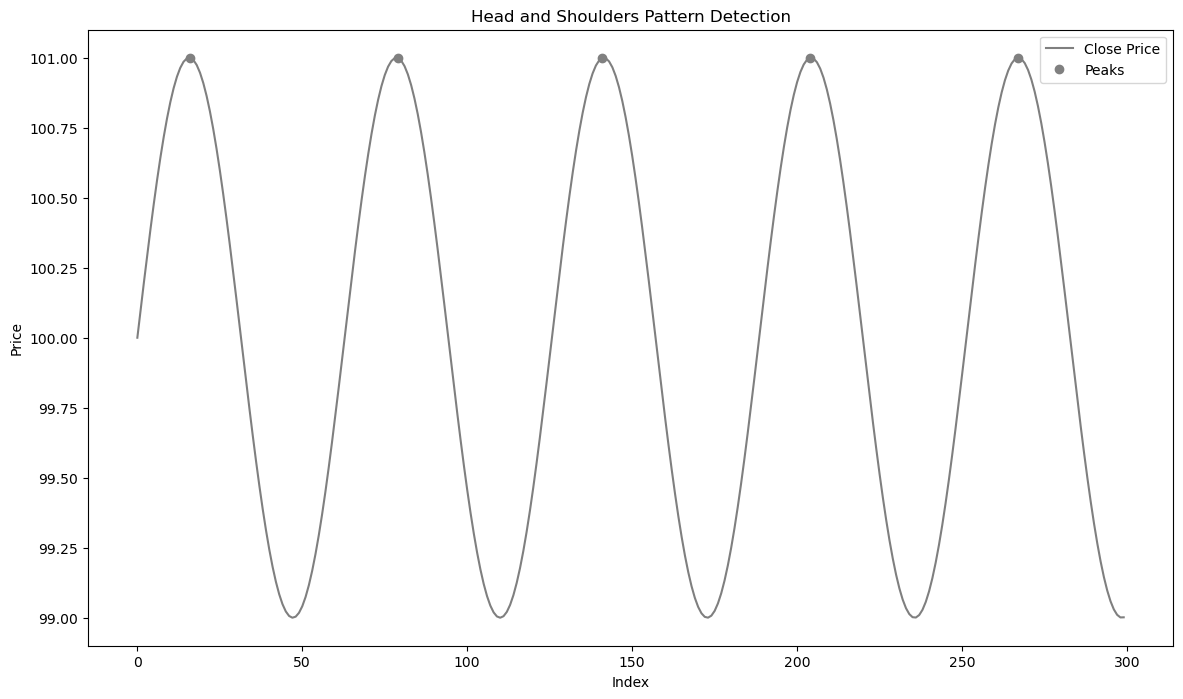

In [7]:
# Plotting the results
plt.figure(figsize=(14, 8))
plt.plot(close_prices, label='Close Price', color='black', alpha=0.5)
plt.plot(peaks, peak_values, "o", label="Peaks", color="gray")

# Highlight detected patterns
for pattern in patterns:
    plt.plot(pattern["Left Shoulder Index"], pattern["Left Shoulder Price"], "o", color="green", label="Left Shoulder")
    plt.plot(pattern["Head Index"], pattern["Head Price"], "o", color="red", label="Head")
    plt.plot(pattern["Right Shoulder Index"], pattern["Right Shoulder Price"], "o", color="blue", label="Right Shoulder")

plt.legend()
plt.title("Head and Shoulders Pattern Detection")
plt.xlabel("Index")
plt.ylabel("Price")
plt.show()

# Display detected patterns
for i, pattern in enumerate(patterns, start=1):
    print(f"Pattern {i}:")
    print(f" Left Shoulder at index {pattern['Left Shoulder Index']} with price {pattern['Left Shoulder Price']}")
    print(f" Head at index {pattern['Head Index']} with price {pattern['Head Price']}")
    print(f" Right Shoulder at index {pattern['Right Shoulder Index']} with price {pattern['Right Shoulder Price']}\n")